# Imports

In [19]:
%load_ext autoreload
%autoreload 2

import numpy as np

import matplotlib.pyplot as plt  
import seaborn as sbn
plt.style.use('seaborn-whitegrid')
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
linestyles = ['-','--','-.',':']

from HANCModel import HANCModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


C:\Users\wrc938\AppData\Local\Temp\ipykernel_12756\3202124864.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


**Settings:**

In [20]:
SKIP_NN = False
LOAD_RBF = False
LOAD_OLS = False
LOAD_NN = False
Twindow = 1_000

# Perfect foresight

In [21]:
model = HANCModelClass(name='perfect_foresight')

In [22]:
par = model.par
ss = model.ss
path = model.path
sim = model.sim

## Solve

In [23]:
model.find_ss(do_print=True,K_min=4.0,K_max=12.0)

K =   4.00000000 -> A_hh-A = 332.29547951
K =  12.00000000 -> A_hh-A = -10.32777705
search for K
  0: K =  11.75885403 -> A_hh-A = -10.02808763
  1: K =   7.87942702 -> A_hh-A =  -3.27960853
  2: K =   6.04823111 -> A_hh-A =  43.06684429
  3: K =   7.74984632 -> A_hh-A =  -2.85745039
  4: K =   6.92733023 -> A_hh-A =   1.36392867
  5: K =   7.19308539 -> A_hh-A =  -0.43517335
  6: K =   7.12880356 -> A_hh-A =  -0.05609909
  7: K =   7.11966633 -> A_hh-A =   0.00025482
  8: K =   7.11970765 -> A_hh-A =  -0.00000146
  9: K =   7.11970742 -> A_hh-A =  -0.00000000
 10: K =   7.11970742 -> A_hh-A =  -0.00000000
 11: K =   7.11970742 -> A_hh-A =   0.00000000

K =   7.11970742

Implied K =  7.120
Implied Y =  0.990
Implied Z =  0.523
Implied u =  0.990
Implied r = -0.004
Implied w =  0.663
Implied K/Y =  7.192
Discrepancy in A-A_hh =  -0.000000000025
Discrepancy in C-C_hh =   0.000000000171


In [ ]:
model.test_path()

shocks: Z 
unknowns: K 

blocks.block_pre
 L                0.0e+00
 u                0.0e+00
 rk               0.0e+00
 r                0.0e+00
 w                0.0e+00
 Y                0.0e+00
 C                0.0e+00
 A                0.0e+00
hh
 A_hh             8.1e-09
 C_hh             1.4e-10
blocks.block_post
 clearing_A       8.1e-09 [target]
 clearing_C           nan


In [ ]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for r               in 0.3 secs
curly_Y and curly_D calculated for w               in 0.4 secs
curly_E calculated in 1.3 secs
builiding blocks combined in 0.0 secs
household Jacobian computed in 2.1 secs

full Jacobians:
full Jacobian to unknowns computed in 0.1 secs [in evaluate_blocks(): 0.1 secs]
full Jacobian to shocks computed in 0.1 secs [in evaluate_blocks(): 0.0 secs]


In [ ]:
par.jump_Z = 0.02*ss.Z
par.std_Z = 0.01*ss.Z

In [ ]:
model.find_transition_path(shocks=['Z'], do_print=True,do_end_check=False) # check end problem later

finding the transition path:
 it =   0 -> max. abs. error = 1.38e-01
 it =   1 -> max. abs. error = 7.81e-03
 it =   2 -> max. abs. error = 1.88e-04
 it =   3 -> max. abs. error = 3.23e-05
 it =   4 -> max. abs. error = 5.50e-06
 it =   5 -> max. abs. error = 8.40e-09
 it =   6 -> max. abs. error = 1.46e-10
 it =   7 -> max. abs. error = 9.22e-13

transition path found in 1.0 secs


## IRFs

In [ ]:
model.find_IRFs(shocks=['Z'], do_print=True)

linear transition path found in 0.0 secs [finding solution matrix: 0.0 secs]


### shocks ###


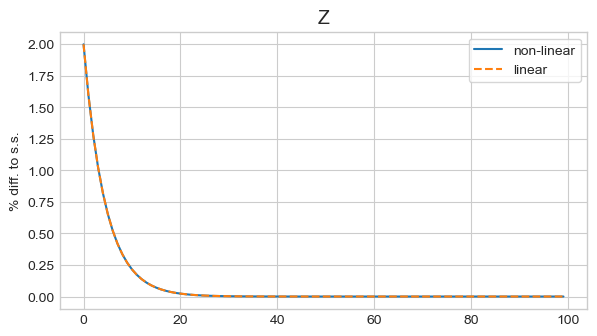


### varnames ###


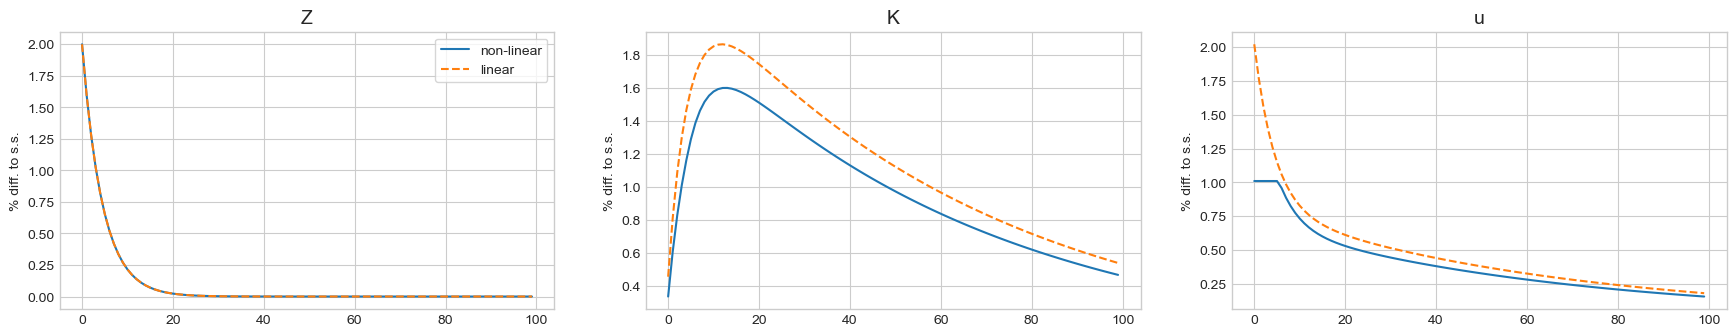


### tagets ###


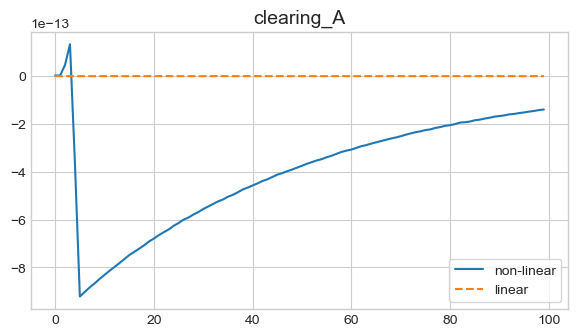

In [ ]:
paths = ['Z','K','u']
model.show_IRFs(paths,ncols=3,T_max=100,do_linear=True)

## Simulation

In [ ]:
np.random.seed(1917)
model.simulate(do_print=True)

simulation prepared in 0.8 secs [solution matrix: 0.0 secs, households: 0.8 secs]
aggregates simulated in 0.4 secs
household policies simulated in 12.8 secs
distribution simulated in 1.7 secs
aggregates calculated from distribution in 0.0 secs


### Z ###


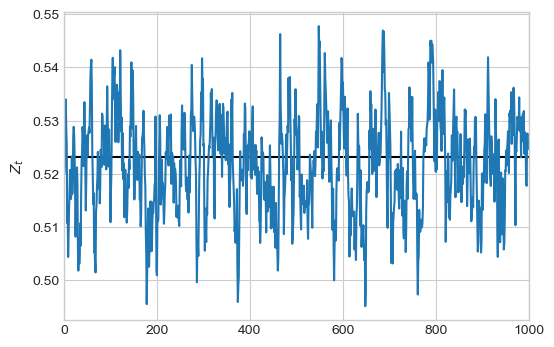

### K ###


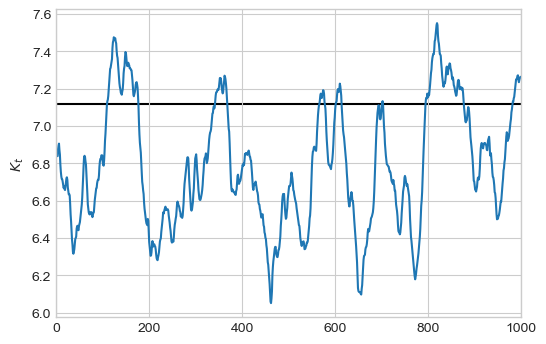

### u ###


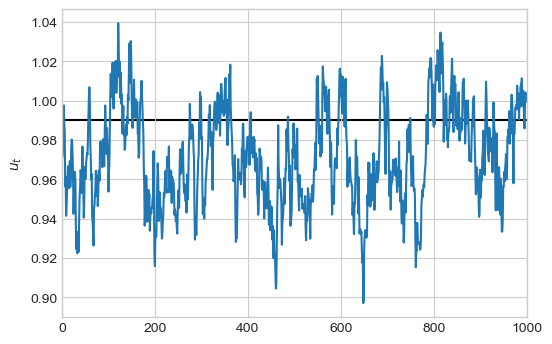

In [ ]:
for varname in ['Z','K','u']:
        
    print(f'### {varname} ###')
    
    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)
    ax.plot(ss.__dict__[varname]+sim.__dict__[f'd{varname}'][-Twindow:])
    ax.axhline(ss.__dict__[varname],color='black',zorder=0)
    ax.set_ylabel(f'${varname}_t$')
    ax.set_xlim([0,Twindow])
    plt.show()
    

## Out-of-sample

In [ ]:
model_alt = model.copy()
model_alt.dpols = model.dpols
model_alt.simulate(do_print=True)

simulation prepared in 0.3 secs [solution matrix: 0.0 secs, households: 0.3 secs]
aggregates simulated in 0.0 secs
household policies simulated in 12.6 secs
distribution simulated in 8.4 secs
aggregates calculated from distribution in 0.1 secs


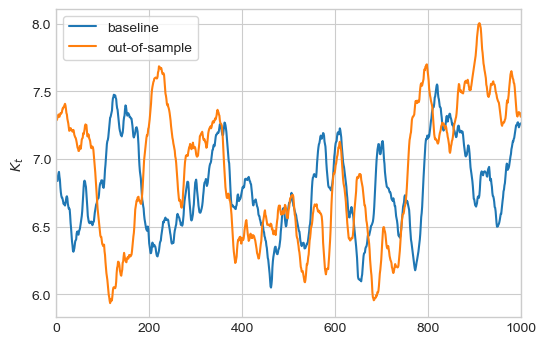

In [ ]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
ax.plot(ss.K+sim.dK[-Twindow:],label='baseline')
ax.plot(ss.K+model_alt.sim.dK[-Twindow:],label='out-of-sample')
ax.set_ylabel(f'$K_t$')
ax.legend(frameon=True)
ax.set_xlim([0,Twindow]);

# Global solution

In [ ]:
def solve(model,load,do_print=True):
    
    if load:
        model.load_global(do_print=do_print)
        model.simulate_global(do_print=do_print)
        model.estimate_PLM(None,do_print=do_print)
    else:
        #model.estimate_PLM(None,do_print=do_print)
        model.solve_global(do_print=do_print)
        model.save_global(do_print=do_print)        
        

## RBF

In [ ]:
model_RBF = model.copy(name='RBF')
model_RBF.setup_global(PLM_method='RBF')
model_RBF.set_inital_values(do_print=True)

initial values found in 7.4 secs


In [ ]:
solve(model_RBF,LOAD_RBF)

PLM estimated with RBF in 2.6 secs

iteration =    0


Traceback (most recent call last):
  File "c:\Users\wrc938\OneDrive - University of Copenhagen\CEBI\Global HA\Global HA updated\GlobalHA\HANC_nocapadjcost\solve_global.py", line 89, in solve_hh_global
    solve_hh_global_backwards(par,ss,KS.PLM_K,KS.v_a,KS.v_a,KS.a,KS.c)
  File "c:\Users\wrc938\AppData\Local\anaconda3\Lib\site-packages\numba\core\dispatcher.py", line 420, in _compile_for_args
    return_val = self.compile(tuple(argtypes))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\wrc938\AppData\Local\anaconda3\Lib\site-packages\numba\core\dispatcher.py", line 965, in compile
    cres = self._compiler.compile(args, return_type)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\wrc938\AppData\Local\anaconda3\Lib\site-packages\numba\core\dispatcher.py", line 125, in compile
    status, retval = self._compile_cached(args, return_type)
                     ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\wrc938\AppData\Local\anaconda3\Lib\si

KeyboardInterrupt: 

## OLS

In [ ]:
model_OLS = model.copy(name='OLS')
model_OLS.setup_global(PLM_method='OLS')
model_OLS.set_inital_values(do_print=True)

initial values found in 7.7 secs


In [ ]:
solve(model_OLS,LOAD_OLS)

PLM estimated with OLS in 0.0 secs

iteration =    0
household problem solved in 1.0 mins 29 secs [362 iterations]
model simulated in 5.6 secs
extrapolation: Pr[Z < Z_grid[0]] = 0.00, Pr[Z > Z_grid[-1]] = 0.00
extrapolation: Pr[K < K_grid[0]] = 0.00, Pr[K > K_grid[-1]] = 0.00
PLM estimated with OLS in 0.0 secs
max. abs. diff. in PLM 2.5e-02
done in 1.0 mins 35 secs

iteration =    1
household problem solved in 56.5 secs [272 iterations]
model simulated in 1.7 secs
extrapolation: Pr[Z < Z_grid[0]] = 0.00, Pr[Z > Z_grid[-1]] = 0.00
extrapolation: Pr[K < K_grid[0]] = 0.00, Pr[K > K_grid[-1]] = 0.00
PLM estimated with OLS in 0.0 secs
max. abs. diff. in PLM 1.3e-02
done in 58.2 secs

iteration =    2
household problem solved in 36.7 secs [166 iterations]
model simulated in 3.5 secs
extrapolation: Pr[Z < Z_grid[0]] = 0.00, Pr[Z > Z_grid[-1]] = 0.00
extrapolation: Pr[K < K_grid[0]] = 0.00, Pr[K > K_grid[-1]] = 0.00
PLM estimated with OLS in 0.0 secs
max. abs. diff. in PLM 7.0e-03
done in 40.2

## Neural net

In [ ]:
if not SKIP_NN:
    model_NN = model.copy(name='NN')
    model_NN.setup_global(PLM_method='NN')
    model_NN.set_inital_values(do_print=True)

initial values found in 8.3 secs


In [ ]:
if not SKIP_NN:
    solve(model_NN,LOAD_NN)

PLM estimated with neural-net in 40.8 secs [mea: 1.74e-04, # of epochs:  247]

iteration =    0
household problem solved in 1.0 mins 34 secs [363 iterations]
model simulated in 5.5 secs
extrapolation: Pr[Z < Z_grid[0]] = 0.00, Pr[Z > Z_grid[-1]] = 0.00
extrapolation: Pr[K < K_grid[0]] = 0.00, Pr[K > K_grid[-1]] = 0.00
PLM estimated with neural-net in 53.2 secs [mea: 1.52e-04, # of epochs:  322]
max. abs. diff. in PLM 5.5e-01
done in 2.0 mins 33 secs

iteration =    1
household problem solved in 1.0 mins 9 secs [356 iterations]
model simulated in 1.5 secs
extrapolation: Pr[Z < Z_grid[0]] = 0.00, Pr[Z > Z_grid[-1]] = 0.00
extrapolation: Pr[K < K_grid[0]] = 0.00, Pr[K > K_grid[-1]] = 0.00
PLM estimated with neural-net in 51.7 secs [mea: 1.52e-04, # of epochs:  322]
max. abs. diff. in PLM 3.3e-01
done in 2.0 mins 2 secs

iteration =    2
household problem solved in 58.6 secs [302 iterations]
model simulated in 1.4 secs
extrapolation: Pr[Z < Z_grid[0]] = 0.00, Pr[Z > Z_grid[-1]] = 0.00
extr

# PLMs

In [ ]:
models = [model_OLS,model_RBF]
if not SKIP_NN:
    models.append(model_NN)

OLS


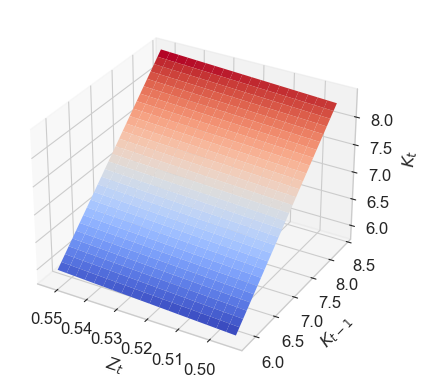

RBF


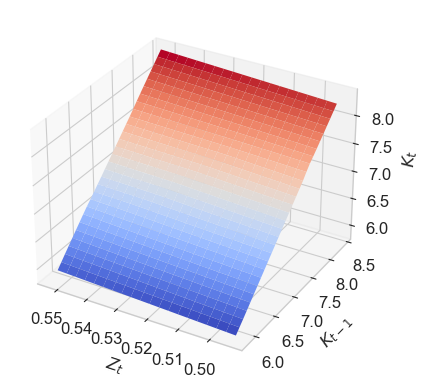

NN


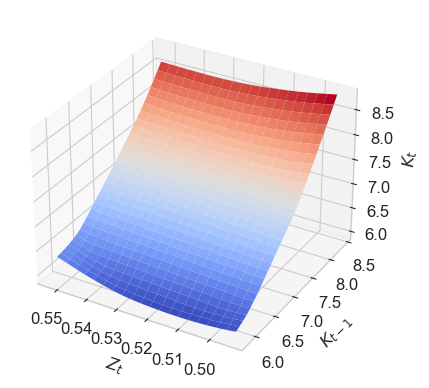

In [ ]:
for model_ in models:
    
    print(model_.name)
    
    fig = plt.figure(figsize=(6,4),dpi=100)

    ax = fig.add_subplot(1,1,1,projection='3d')
    
    Z, K_lag = np.meshgrid(model_.par.Z_grid,model_.par.K_grid)
    ax.plot_surface(Z,K_lag,model_.KS.PLM_K.T,cmap='coolwarm')
    
    ax.set_xlabel('$Z_t$')
    ax.set_ylabel('$K_{t-1}$')
    ax.set_zlabel('$K_t$');
    ax.invert_xaxis()
    fig.tight_layout() 
    fig.savefig(f'figs/PLM_{model_.name}.pdf')
    
    plt.show()


# Simulation

In [ ]:
for model_ in models:    
    print(model_.name)
    model_.sim.Z[:] = model.ss.Z + model.sim.dZ
    model_.simulate_global(do_print=True)                    
    print('')

OLS
model simulated in 1.4 secs

RBF
model simulated in 1.5 secs

NN
model simulated in 1.4 secs



In [ ]:
def plot_sim_compare_linear(model,varname,figname=None,Twindow=1000):
    
    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)

    ax.plot(np.arange(Twindow),ss.__dict__[varname]+sim.__dict__[f'd{varname}'][-Twindow:],
            color='black',lw=2,alpha=0.20,label=f'linear')
    ax.plot(np.arange(Twindow),model.sim.__dict__[varname][-Twindow:],lw=2,ls='--',label=model.name)
    
    ax.set_ylabel(f'${varname}_t$')
    ax.legend(frameon=True)
    ax.set_xlim([0,Twindow])
    fig.tight_layout() 
    
    if not figname is None: fig.savefig(f'figs/{figname}_{varname}.pdf')

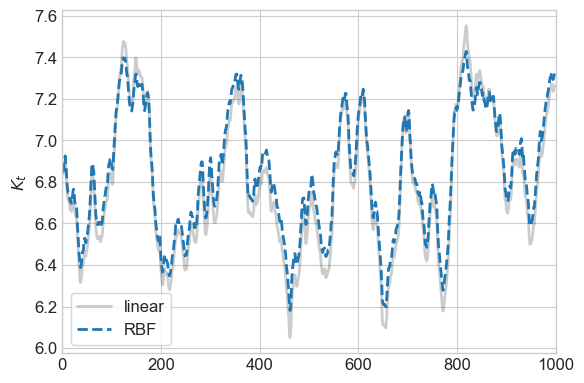

In [ ]:
plot_sim_compare_linear(model_RBF,varname='K',figname='sim_compare_linear_RBF')

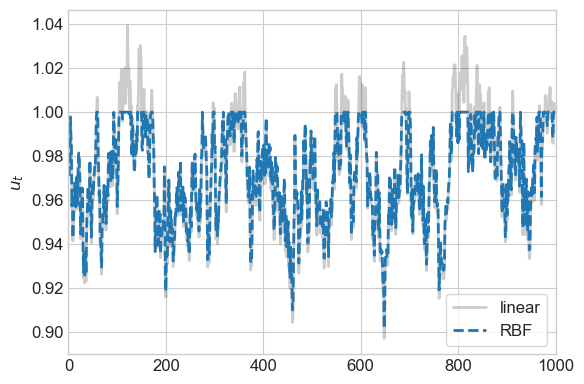

In [ ]:
plot_sim_compare_linear(model_RBF,varname='u',figname='sim_compare_linear_RBF')

In [ ]:
def plot_sim_compare(models,varname,figname=None,Twindow=1000):
    
    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)
    
    for i,model_ in enumerate(models):
        ax.plot(np.arange(Twindow),model_.sim.__dict__[varname][-Twindow:],label=f'{model_.name}',ls=linestyles[i],lw=2)

    ax.set_ylabel(f'${varname}_t$')
    ax.legend(frameon=True)
    ax.set_xlim([0,Twindow])
    plt.tight_layout()
    
    if not figname is None: fig.savefig(f'figs/{figname}_{varname}.pdf')    

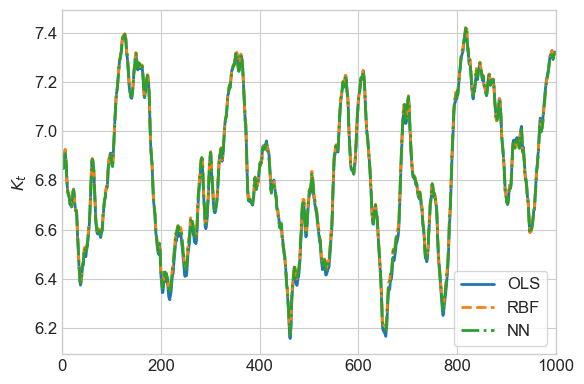

In [ ]:
plot_sim_compare(models,varname='K',figname='sim_compare')

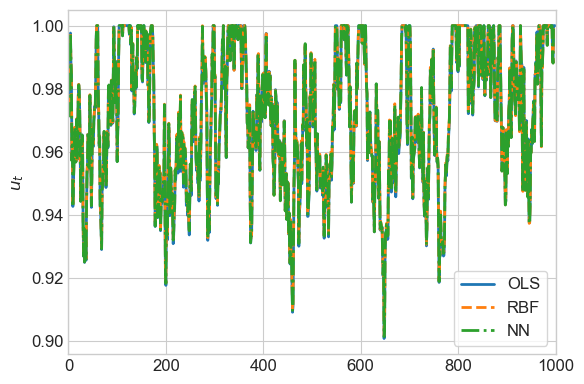

In [ ]:
plot_sim_compare(models,varname='u',figname='sim_compare')

# Out-of-sample simulation

In [ ]:
for model_ in models:    
    print(model_.name)
    model_.sim.Z[:] = model_alt.ss.Z + model_alt.sim.dZ
    model_.simulate_global(do_print=True)                    
    print('')

OLS
model simulated in 1.4 secs

RBF
model simulated in 1.4 secs

NN
model simulated in 1.4 secs



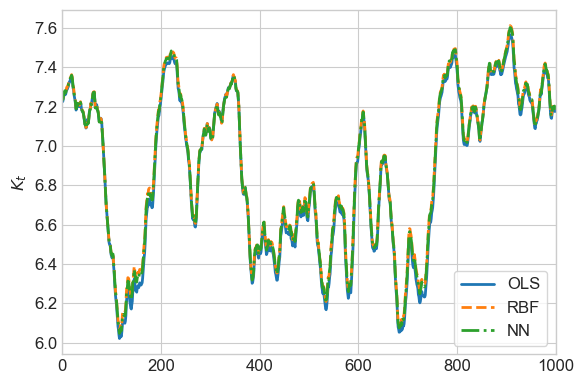

In [ ]:
plot_sim_compare(models,varname='K',figname='sim_compare_out_of_sample')

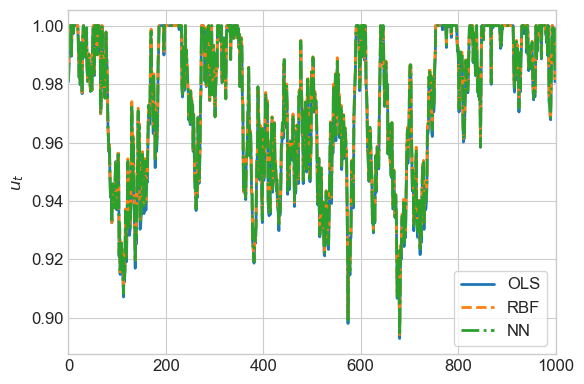

In [ ]:
plot_sim_compare(models,varname='u',figname='sim_compare_out_of_sample')

# Prediction errors

In [ ]:
for model_ in models:
    print(model_.name)
    model_.compute_errors(do_print=True)
    print('')

OLS
max abs.:      4.86
mean abs.:     0.99
median abs.:   0.84
99 perc. abs.: 3.52
90 perc. abs.: 1.99
R2:            0.9405
errors computed in 0.1 secs

RBF
max abs.:      0.37
mean abs.:     0.03
median abs.:   0.02
99 perc. abs.: 0.25
90 perc. abs.: 0.06
R2:            0.9999
errors computed in 3.9 secs

NN
max abs.:      3.17
mean abs.:     0.08
median abs.:   0.02
99 perc. abs.: 1.69
90 perc. abs.: 0.09
R2:            0.9973
errors computed in 15.1 secs



In [ ]:
if SKIP_NN:
    models_tab = [model_OLS,model_RBF,None]
else:
    models_tab = [model_OLS,model_RBF,model_NN]

# a. errors
with open(r'tabs\errors.tex', 'w') as f:
    
    for row in ['max','mean','median','99th perc.','90th perc.']:
        line = f' {row} &'
        for model_ in models_tab: 
            if model_ is None: 
                line += ' &'
            else:
                den_haan = model_.errors['den_haan']
                if row == 'max':
                    value = f' {den_haan.max():.2f}'
                elif row == 'mean':
                    value = f' {den_haan.mean():.2f}'
                elif row == 'median':
                    value = f' {np.percentile(den_haan,50):.2f}'
                elif row == '99th perc.':
                    value = f' {np.percentile(den_haan,99):.2f}'  
                elif row == '90th perc.':
                    value = f' {np.percentile(den_haan,90):.2f}'                      
                else:
                    raise NotImplementedError
                line += value + ' &'
        line = line[:-1] + '\\\\'    
        f.write(line + '\n')

# b. timings        
with open(r'tabs\timings.tex', 'w') as f:
    
    for row,key in [('total','total'),
                    (' - solve household problem','solve'),
                    (' - simulate (no market clearing)','simulate'),
                    (' - estimate PLMs','PLM'),(None,None),
                    ('iterations','it')]:
        
        if row is None:
            f.write('\\\\\n')
            continue
        line = f' {row} &'
        for model_ in models_tab: 
            if model_ is None: 
                line += ' &'
            else:
                if key == 'it':
                    value = f' {model_.timings[key]}' 
                else:
                    if type(model_.timings[key]) is set:
                        model_.timings[key] = list(model_.timings[key])[0]
                    value = f' {model_.timings[key]:.1f}'             
                line += value + ' &'
        line = line[:-1] + '\\\\'    
        f.write(line + '\n')

## Time-path

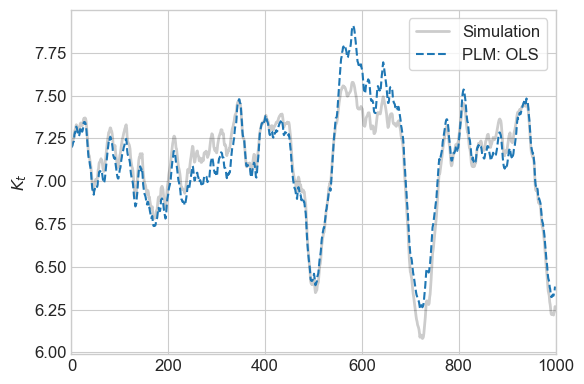

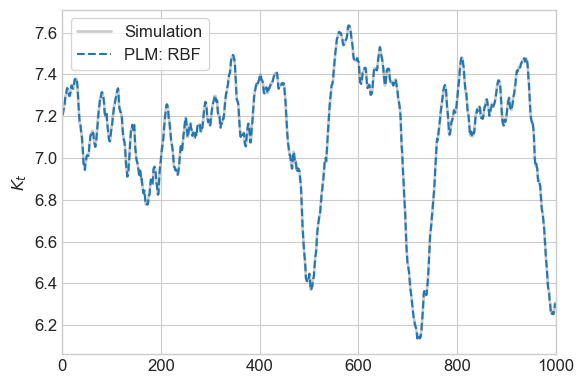

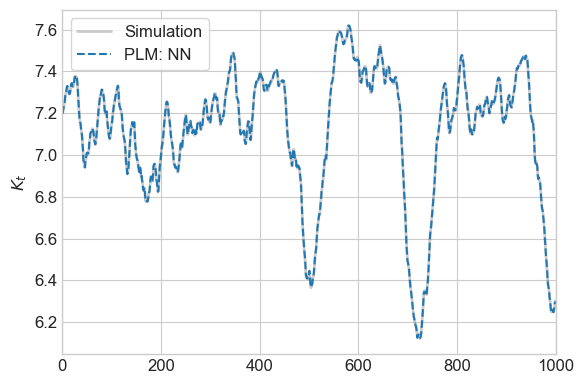

In [ ]:
Twindow = 1000
for model_ in models:
    
    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)

    ax.plot(np.arange(Twindow),model_.errors['K'][:Twindow],label=f'Simulation',color='black',lw=2,alpha=0.2)
    ax.plot(np.arange(Twindow),model_.errors['K_PLM'][:Twindow],label=f'PLM: {model_.name}',ls='--')

    ax.set_ylabel(f'$K_t$')
    ax.legend(frameon=True)
    ax.set_xlim([0,Twindow])
    fig.tight_layout()
    fig.savefig(f'figs/den_haan_errors_time_path_{model_.name}.pdf')
    

## One-step pdf

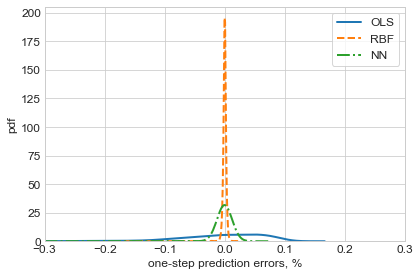

In [ ]:
bound = 0.3
for i,model_ in enumerate(models):
    sbn.kdeplot(model_.errors['one_step'],bw_method=0.2,clip=(-bound,bound),ls=linestyles[i],lw=2,label=model_.name)
    
plt.xlim([-bound,bound])
plt.xlabel('one-step prediction errors, %')
plt.ylabel('pdf')
plt.legend(frameon=True)
plt.tight_layout()    

plt.savefig('figs/one_step_errors_pdf.pdf')

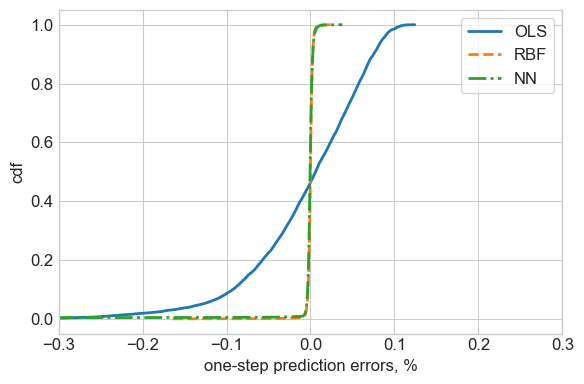

In [ ]:
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)

for i,model_ in enumerate(models):
    y = np.linspace(0,1,model_.errors['one_step'].size)
    x = np.sort(model_.errors['one_step'])
    ax.plot(x,y,ls=linestyles[i],lw=2,label=model_.name)
    
ax.set_xlim([-bound,bound])
ax.set_ylabel('cdf')
ax.set_xlabel('one-step prediction errors, %');
ax.legend(frameon=True)

plt.tight_layout()    
plt.savefig('figs/one_step_errors_cdf.pdf');

# Impulse responses

In [ ]:
for model_ in models:    
    print(model_.name)
    model_.sim.Z[:] = model_alt.ss.Z + model_alt.sim.dZ
    model_.simulate_global(do_print=True)                    
    print('')

OLS
model simulated in 1.3 secs

RBF
model simulated in 1.5 secs

NN
model simulated in 1.5 secs



### OLS ###
IRFs computed from 1118 starting points in 11.0 secs
Z
(1118, 60)


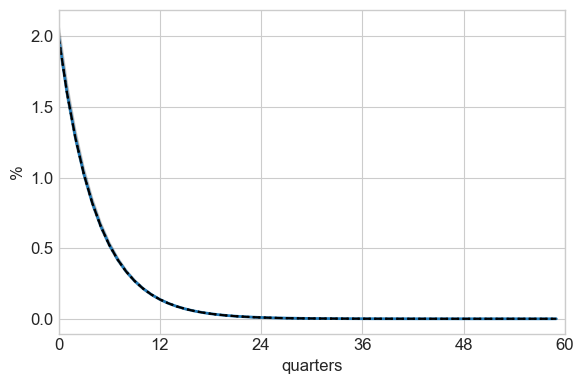

K
(1118, 60)


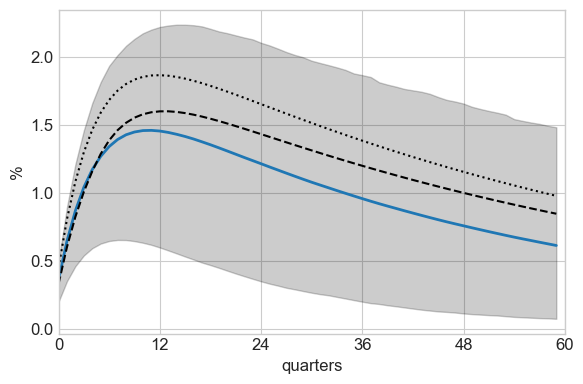

u
(1118, 60)


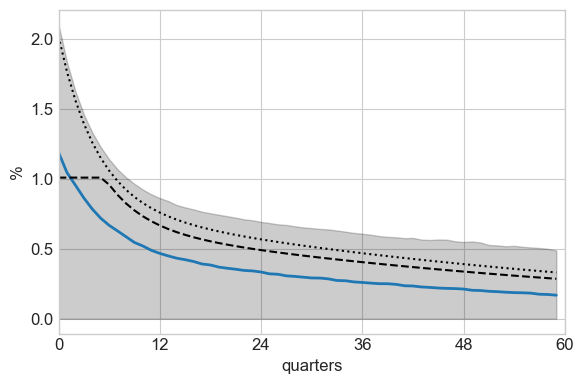

### RBF ###
IRFs computed from 1118 starting points in 10.3 secs
Z
(1118, 60)


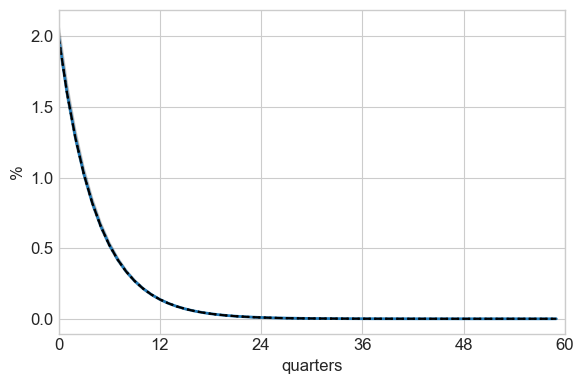

K
(1118, 60)


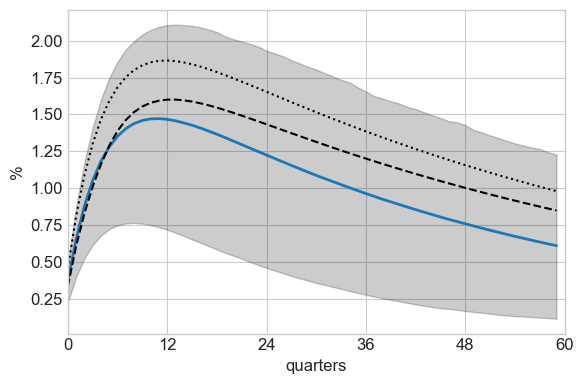

u
(1118, 60)


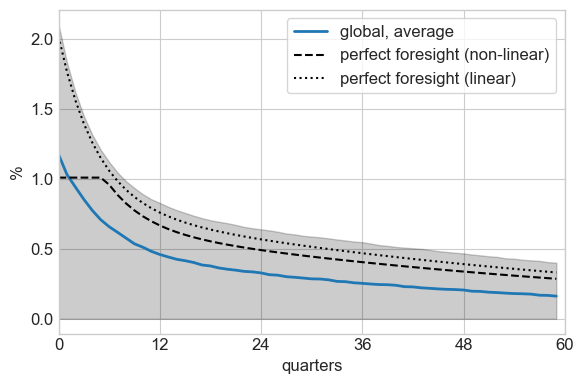

### NN ###
IRFs computed from 1118 starting points in 10.7 secs
Z
(1118, 60)


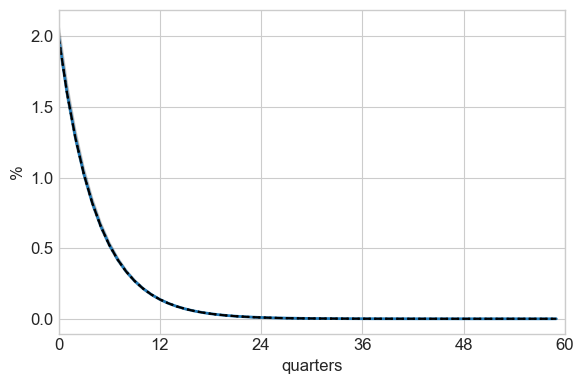

K
(1118, 60)


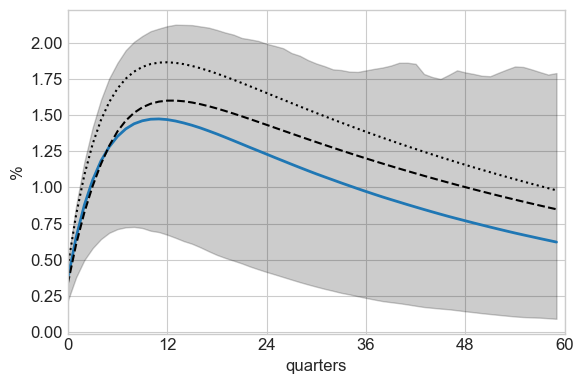

u
(1118, 60)


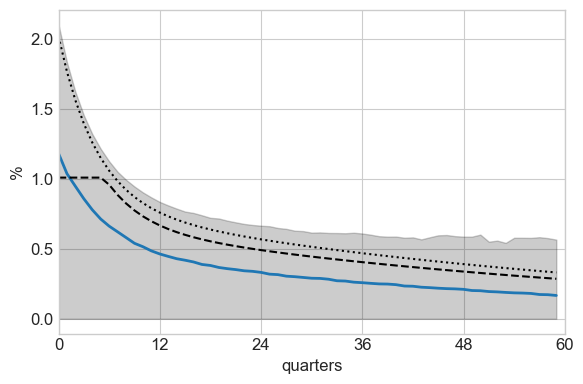

In [ ]:
for model_ in models:
        
    print(f'### {model_.name} ###')
    
    model_.find_global_IRFs(do_print=True)
    
    for varname in ['Z','K','u']:
        
        print(varname)
        
        fig = plt.figure(figsize=(6,4),dpi=100)
        ax = fig.add_subplot(1,1,1)

        IRF = model_.global_IRFs[varname]
        print(IRF.shape)
        ax.fill_between(np.arange(par.IRFT),np.percentile(IRF,1,axis=0),np.percentile(IRF,99,axis=0),
                        color='black',alpha=0.20)
        
        ax.plot(np.arange(par.IRFT),np.mean(IRF,axis=0),lw=2,label='global, average')
    
        ax.plot((path.__dict__[varname][0,:par.IRFT]/ss.__dict__[varname]-1)*100,color='black',ls='--',label='perfect foresight (non-linear)')
        ax.plot((model.IRF[varname][:par.IRFT]/ss.__dict__[varname])*100,color='black',ls=':',label='perfect foresight (linear)')
                
        ax.set_xlim([0,par.IRFT])
        ax.set_ylabel(f'%')
        ax.set_xticks(np.arange(0,par.IRFT+1,12))   
        ax.set_xlabel('quarters')
        if model_.name == 'RBF' and varname == 'u': ax.legend(frameon=True)
        
        fig.tight_layout()
        fig.savefig(f'figs/IRF_{varname}_{model_.name}_global.pdf')
        
        plt.show()

Z


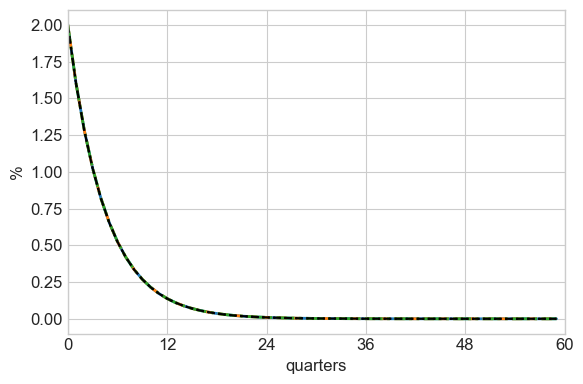

K


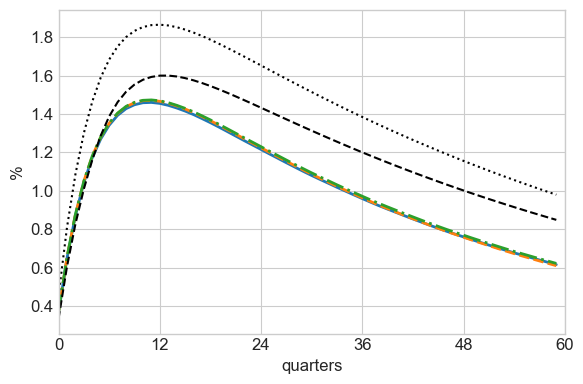

u


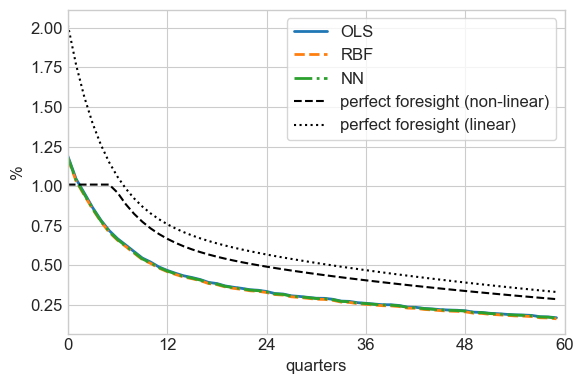

In [ ]:
for varname in ['Z','K','u']:
        
    print(varname)
        
    fig = plt.figure(figsize=(6,4),dpi=100)
    ax = fig.add_subplot(1,1,1)
        
    for i,model_ in enumerate(models):

        IRF = model_.global_IRFs[varname]
        ax.plot(np.arange(par.IRFT),np.mean(IRF,axis=0),label=f'{model_.name}',ls=linestyles[i],lw=2)

    ax.plot((path.__dict__[varname][0,:par.IRFT]/ss.__dict__[varname]-1)*100,color='black',ls='--',label='perfect foresight (non-linear)')
    ax.plot((model.IRF[varname][:par.IRFT]/ss.__dict__[varname])*100,color='black',ls=':',label='perfect foresight (linear)')

    ax.set_xlim([0,par.IRFT])
    ax.set_ylabel(f'%')
    ax.set_xticks(np.arange(0,par.IRFT+1,12))    
    if varname == 'u': ax.legend(frameon=True)
    ax.set_xlabel('quarters')
        
    fig.tight_layout()
    fig.savefig(f'figs/IRF_{varname}_global.pdf')
    plt.show()
    

# 2D PLM plots

In [ ]:
def find_nearest(grid, value):
    ''' find nearest grid index where grid is closest to input value'''
    idx = (np.abs(grid - value)).argmin()
    return idx  

i_Z_fix = find_nearest(model_OLS.par.Z_grid,model_OLS.ss.Z)
i_K_fix = find_nearest(model_OLS.par.K_grid,model_OLS.ss.K)

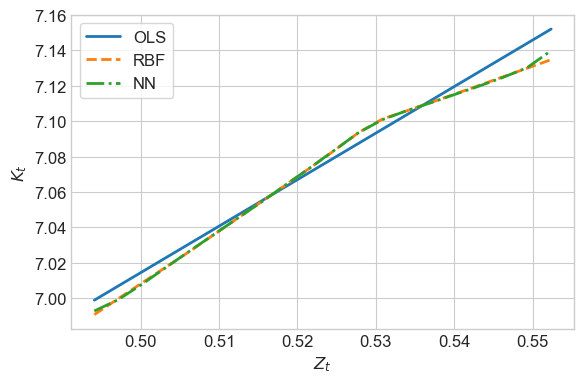

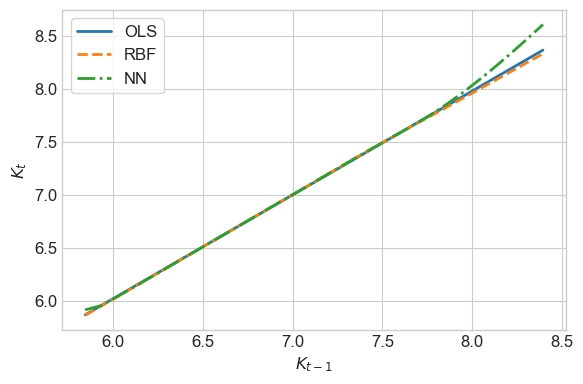

In [ ]:
# a. vary Z
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
for i,model_ in enumerate(models):
    PLM_K = model_.KS.PLM_K.copy()
    ax.plot(model_.par.Z_grid,PLM_K[:,i_K_fix],label=f'{model_.name}',ls=linestyles[i],lw=2) # vary Z
    ax.set_ylabel('$K_t$')
    ax.set_xlabel('$Z_t$')
    ax.legend(frameon=True)
    
fig.tight_layout()
fig.savefig('figs/PLM_K_vary_Z.pdf')
plt.show()

# b. vary K
fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
for i,model_ in enumerate(models):
    PLM_K = model_.KS.PLM_K.copy()
    ax.plot(model_.par.K_grid,PLM_K[i_Z_fix,:],label=f'{model_.name}',ls=linestyles[i],lw=2) # vary K
    ax.set_ylabel('$K_t$')
    ax.set_xlabel('$K_{t-1}$')
    ax.legend(frameon=True)
    
fig.tight_layout()
fig.savefig('figs/PLM_K_vary_K.pdf')
plt.show()